# Introduction

In this repository, we will explore Exploratory Data Analysis (EDA) techniques and demonstrate the model training phase using logistic regression as an example of a machine learning model. The goal is to provide a comprehensive understanding of the data and showcase the implementation of a logistic regression model.

## Getting Started

Importar las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

### Read the csv file of the dataset:


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(url)

### Display the first 5 rows of the data to ensure it has been loaded correctly:


### Assign column names


In [3]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.columns = column_names

In [4]:
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
1  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   

   slope   ca thal  target  
0    2.0  3.0  3.0       2  
1    2.0  2.0  7.0       1  
2    3.0  0.0  3.0       0  
3    1.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


### Display the first 5 rows of the data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


### Get general information about the data:


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### Check for missing values:

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Replace '?' with NaN:

In [8]:
df = df.replace('?', np.nan)

### Once your data is cleaned, you can start exploring the relationships between variables. For example, we want to see the correlation between different features:


In [9]:
correlations = df.corr()

### Visualization of correlations


<Axes: >

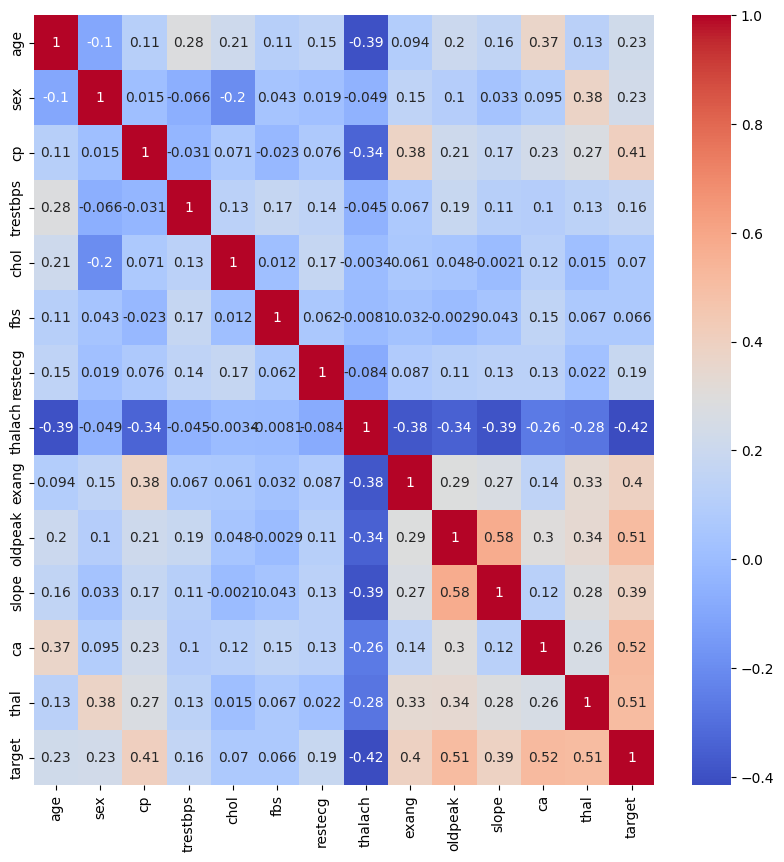

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')

### Box plot:


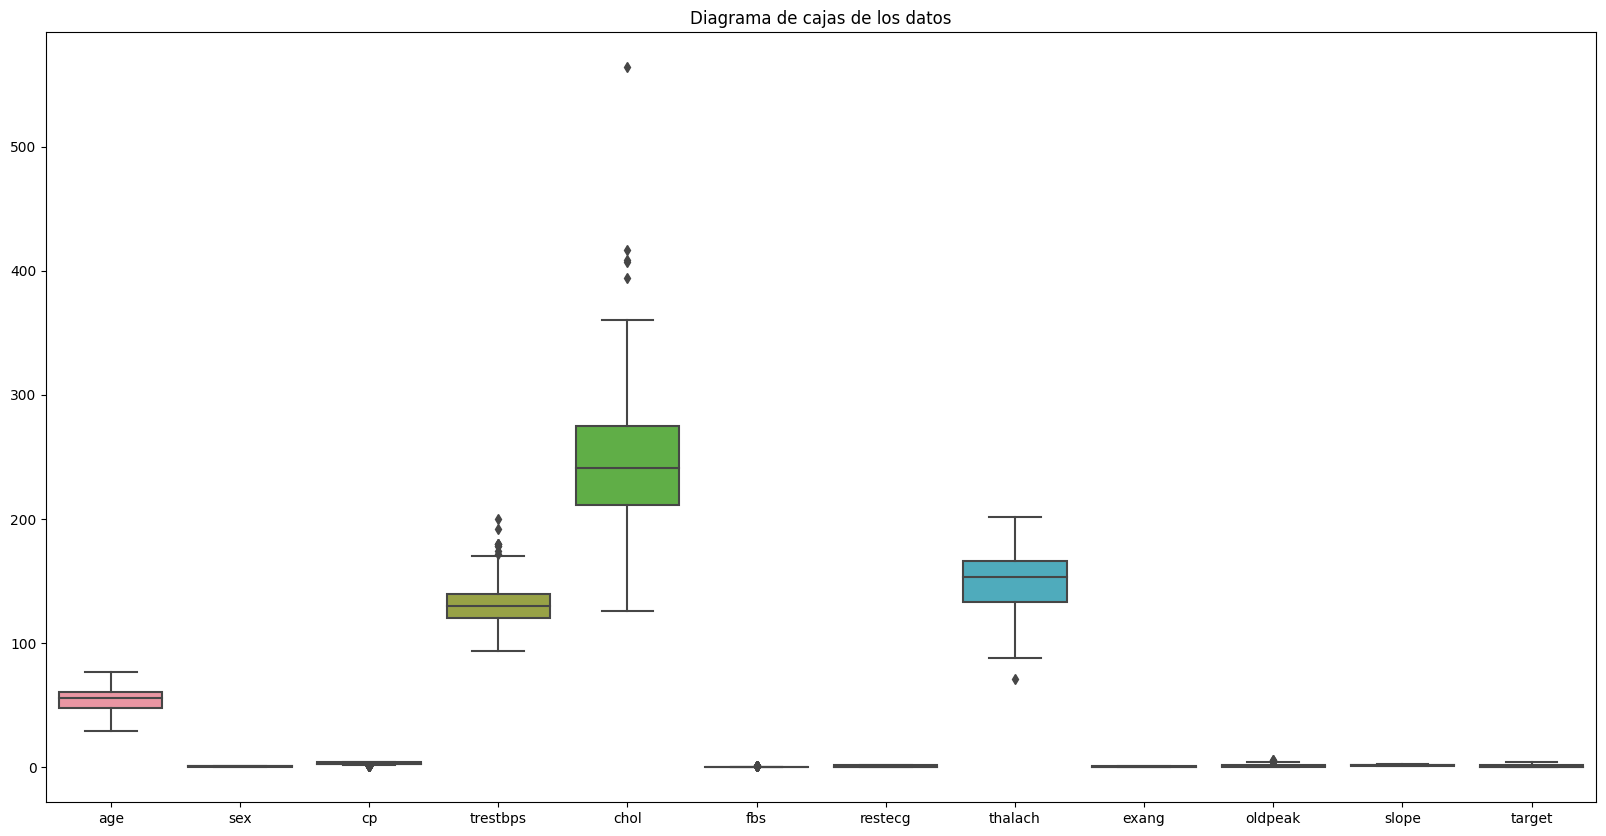

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.title("Diagrama de cajas de los datos")
plt.show()

### Analysis of the target variable 'target':


Text(0.5, 1.0, 'Distribución de la enfermedad cardíaca')

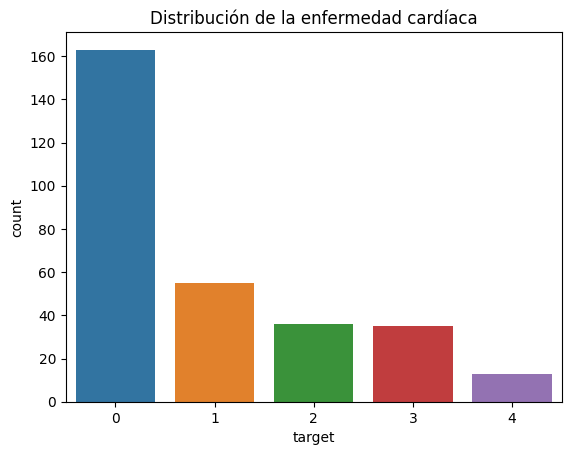

In [12]:
sns.countplot(x='target', data=df)
plt.title('Distribución de la enfermedad cardíaca')

### Split the data into features and target:


In [13]:
X = df.drop(columns='target', axis=1)
y = df['target']

### Split the data into training and test sets:


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create the logistic regression model:


In [15]:
log_reg = LogisticRegression()

### Remove rows with NaN values:


In [16]:
df = df.dropna()

### Define the features and target:


In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Split the data into training and test sets:


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Create an instance of the model:


In [19]:
log_reg = LogisticRegression()

### Fit the model to the training data:


In [20]:
log_reg.fit(X_train, y_train)

C:\Users\Fernanda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Make predictions on the test set:


In [21]:
y_pred = log_reg.predict(X_test)

### Evaluate the model's performance:


In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5166666666666667


### Perform predictions on the test set:


In [23]:
y_pred = log_reg.predict(X_test)

### Measure the model's accuracy:


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy*100:.2f}%")

Precisión del modelo: 51.67%


### Confusion matrix:


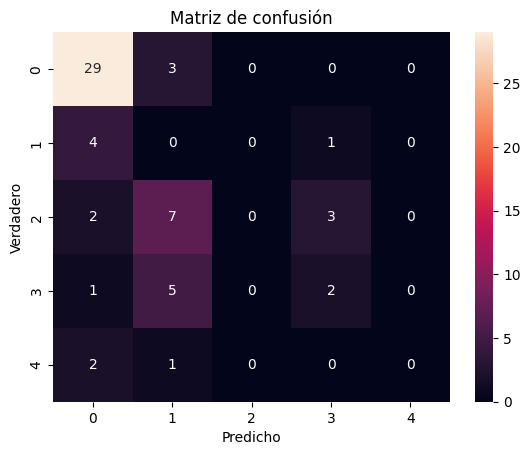

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

## This complete code addresses the data preprocessing phase, data exploration and visualization, creation of a logistic regression model, and evaluation of its performance on the heart disease dataset.